<a href="https://colab.research.google.com/github/rizkyprofs/ML_DL/blob/main/ML_Week4_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Library dan Load Dataset

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="whitegrid")
sns.set_palette("husl")

flu_df = pd.read_csv('flu.csv')

## 2. Exploratory Data Analysis (EDA)

### 2.1. Overview Dataset

In [ ]:
# Menampilkan informasi dasar dataset
print("Shape Dataset:", flu_df.shape)
print("\nInfo Dataset:")
flu_df.info()

# Menampilkan beberapa baris pertama
flu_df.head()

Shape Dataset: (1482, 20)

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis                    1482 non-null   object 
 1   InitialPCRDiagnosis          104 non-null    object 
 2   Age                          1454 non-null   float64
 3   Sex                          1406 non-null   object 
 4   neutrophil                   103 non-null    float64
 5   serumLevelsOfWhiteBloodCell  151 non-null    float64
 6   lymphocytes                  156 non-null    float64
 7   CReactiveProteinLevels       137 non-null    object 
 8   DurationOfIllness            87 non-null     float64
 9   CTscanResults                159 non-null    object 
 10  RiskFactors                  209 non-null    object 
 11  GroundGlassOpacity           93 non-null     object 
 12  Diarrhea                     450 no

,Diagnosis,InitialPCRDiagnosis,Age,Sex,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue
0,H1N1,NaN,67.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,NaN,38.111111,No
1,H1N1,NaN,29.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,NaN,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,NaN,20.0,F,NaN,NaN,NaN,NaN,NaN,NaN,immuno,NaN,NaN,Yes,Yes,NaN,No,NaN,36.555556,Yes
4,H1N1,NaN,21.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.2. Statistik Deskriptif

In [ ]:
# Menampilkan statistik deskriptif
flu_df.describe()

,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,DurationOfIllness,Temperature
count,1454.000000,103.000000,151.000000,156.000000,87.000000,628.000000
mean,26.471040,6.854078,6.885159,1.850154,13.988506,38.068312
std,21.487982,12.690131,4.346668,3.956668,9.043171,1.094468
min,0.000000,0.446000,0.500000,0.130000,1.000000,35.722222
25%,7.000000,2.160000,3.995000,0.637500,7.000000,37.222222
50%,24.000000,3.310000,5.690000,0.905500,12.000000,38.000000
75%,42.000000,6.645000,9.155000,1.605000,20.000000,38.722222
max,88.000000,93.000000,36.070000,30.600000,37.000000,42.222222


### 2.3. Pengecekan Missing Values

In [ ]:
missing_values = flu_df.isnull().sum()
missing_percentage = (missing_values / len(flu_df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
missing_data[missing_data['Missing Values'] > 0].sort_values('Percentage', ascending=False)


,Missing Values,Percentage
ShortnessOfBreath,1407,94.939271
DurationOfIllness,1395,94.129555
GroundGlassOpacity,1389,93.724696
neutrophil,1379,93.049933
InitialPCRDiagnosis,1378,92.982456
CReactiveProteinLevels,1345,90.755735
serumLevelsOfWhiteBloodCell,1331,89.811066
lymphocytes,1326,89.473684
CTscanResults,1323,89.271255
RiskFactors,1273,85.897436


### 2.4. Analisis Target Variable

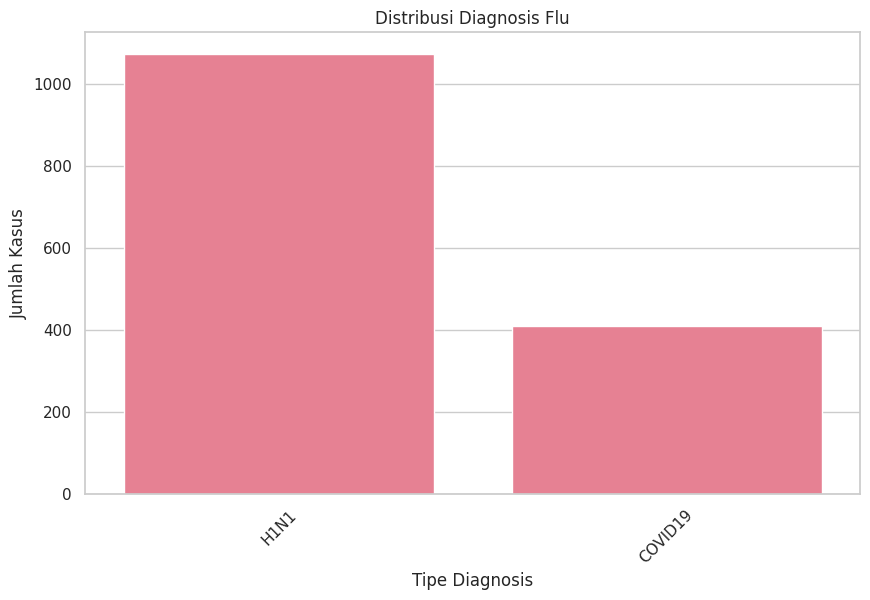


Persentase Distribusi Diagnosis:
Diagnosis
H1N1       72.33
COVID19    27.67
Name: count, dtype: float64


In [ ]:
# Menghitung distribusi kelas target
target_distribution = flu_df['Diagnosis'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=target_distribution.index, y=target_distribution.values)
plt.title('Distribusi Diagnosis Flu')
plt.xlabel('Tipe Diagnosis')
plt.ylabel('Jumlah Kasus')
plt.xticks(rotation=45)
plt.show()

# Menampilkan persentase distribusi
print("\nPersentase Distribusi Diagnosis:")
print((target_distribution / len(flu_df) * 100).round(2))

## 3. Feature Engineering

### 3.1. Penanganan Missing Values

In [ ]:
def handle_missing_values(df):
    # Numeric columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

    # Categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

    return df

# Apply fungsi
flu_df = handle_missing_values(flu_df)


### 3.2. Encoding Categorical Variables

In [ ]:
# Fungsi untuk encoding categorical variables
def encode_categorical(df):
    le = LabelEncoder()
    categorical_cols = df.select_dtypes(include=['object']).columns

    for col in categorical_cols:
        df[col] = le.fit_transform(df[col].astype(str))

    return df

# Apply encoding
flu_df = encode_categorical(flu_df)

## 4. Data Visualization

### 4.1. Distribusi Fitur Numerik

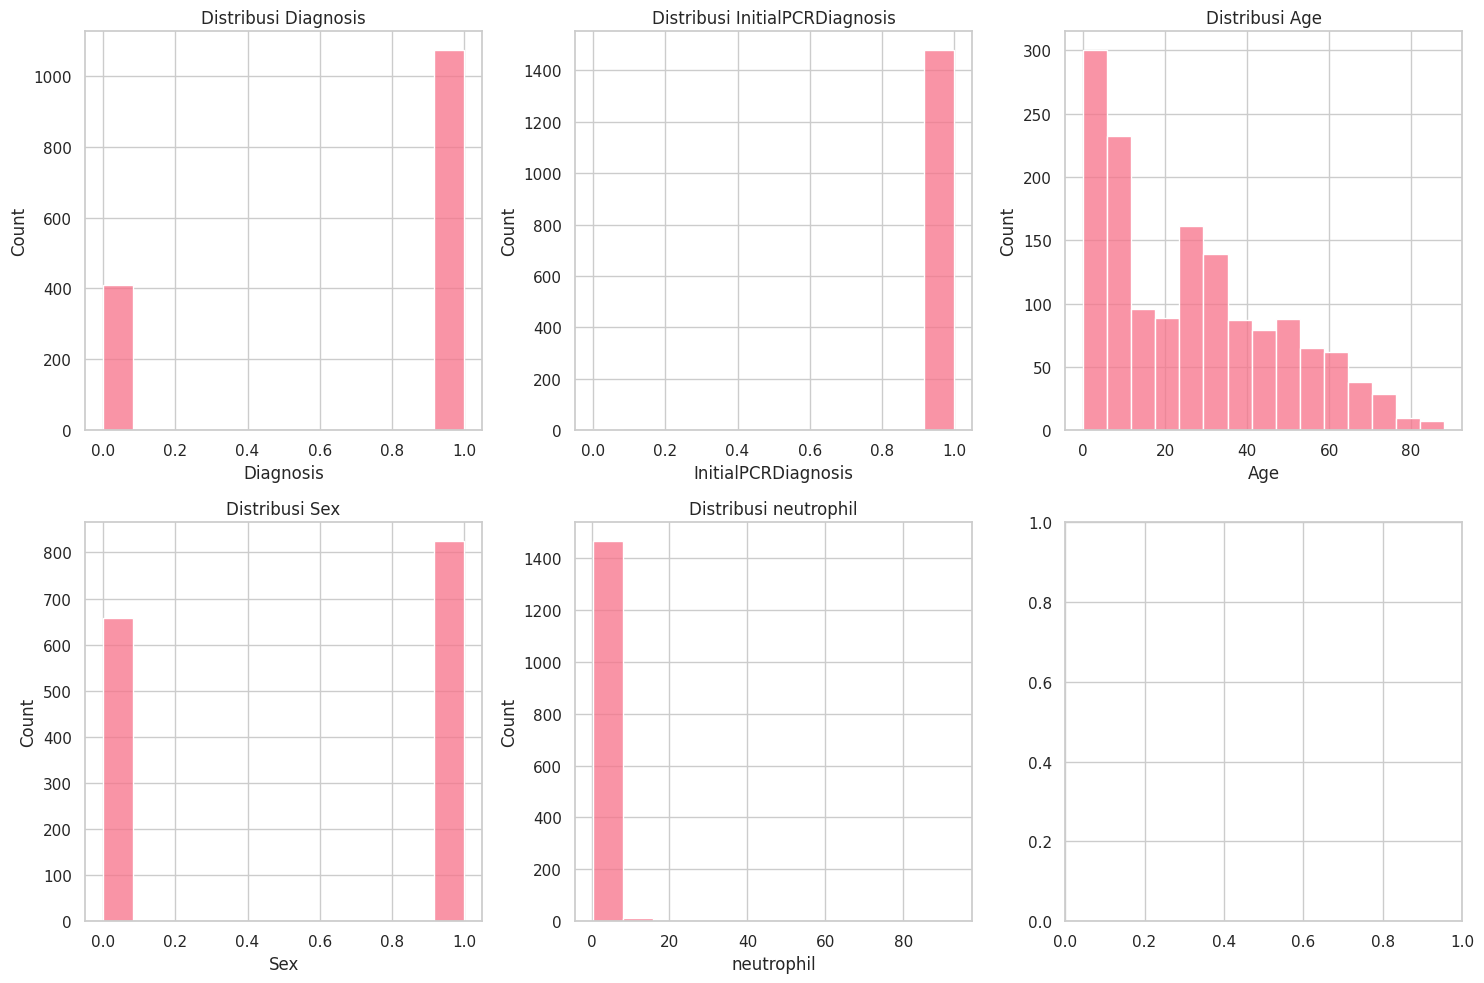

In [ ]:
# Memilih beberapa features numerik untuk visualisasi
numeric_features = flu_df.select_dtypes(include=['int64', 'float64']).columns[:5]

# Membuat histogram untuk setiap feature
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.histplot(data=flu_df, x=feature, ax=axes[i])
    axes[i].set_title(f'Distribusi {feature}')

plt.tight_layout()
plt.show()

### 4.2. Box Plot untuk Features Numerik

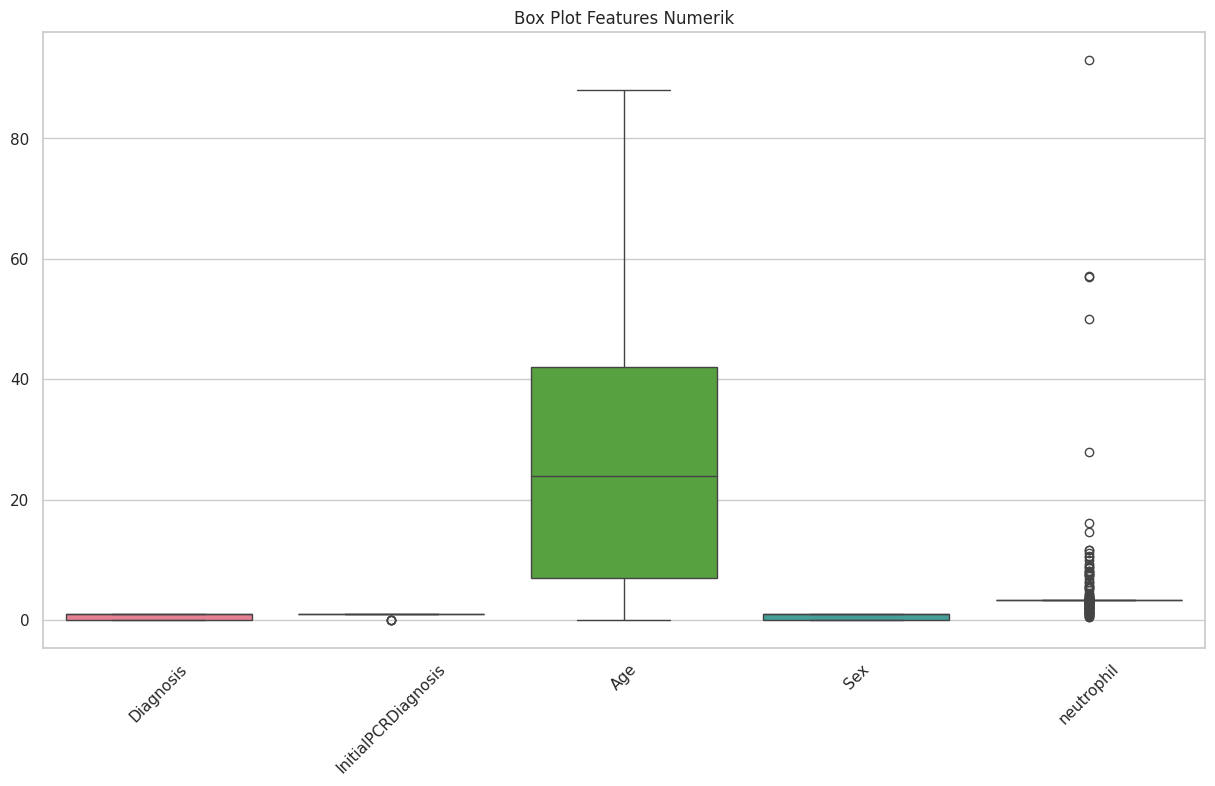

In [ ]:
# Membuat box plot untuk setiap feature numerik
plt.figure(figsize=(15, 8))
sns.boxplot(data=flu_df[numeric_features])
plt.title('Box Plot Features Numerik')
plt.xticks(rotation=45)
plt.show()

### 4.3. Korelasi antar Features

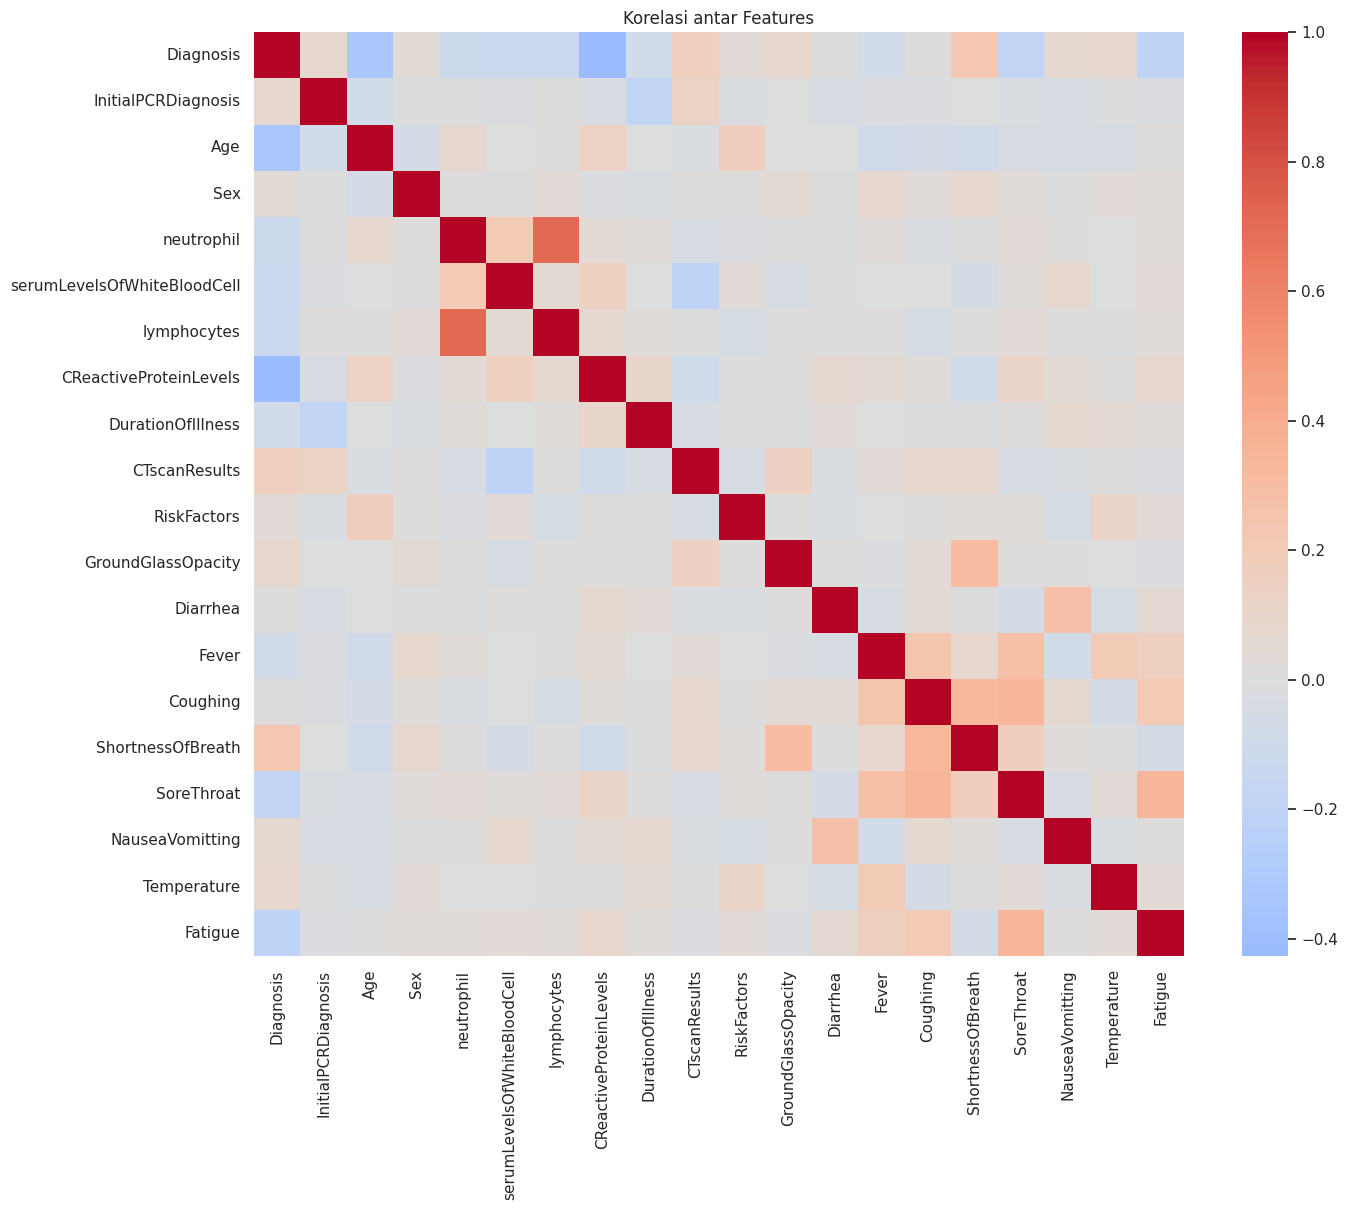

In [ ]:
# Menghitung korelasi
correlation_matrix = flu_df.corr()

# Visualisasi heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Korelasi antar Features')
plt.show()

## 5. Model Training dan Evaluasi

### 5.1. Persiapan Data

In [ ]:
# Memisahkan features dan target
X = flu_df.drop('Diagnosis', axis=1)
y = flu_df['Diagnosis']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 5.2. Model Training

In [ ]:
# Inisialisasi model
from sklearn.ensemble import RandomForestClassifier # Import the RandomForestClassifier class
model = RandomForestClassifier(random_state=42)

# Training model
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

### 5.3. Evaluasi Model

Akurasi: 0.9158
Presisi: 0.9252
Recall: 0.9565
F1-Score: 0.9406
AUC: 0.9119


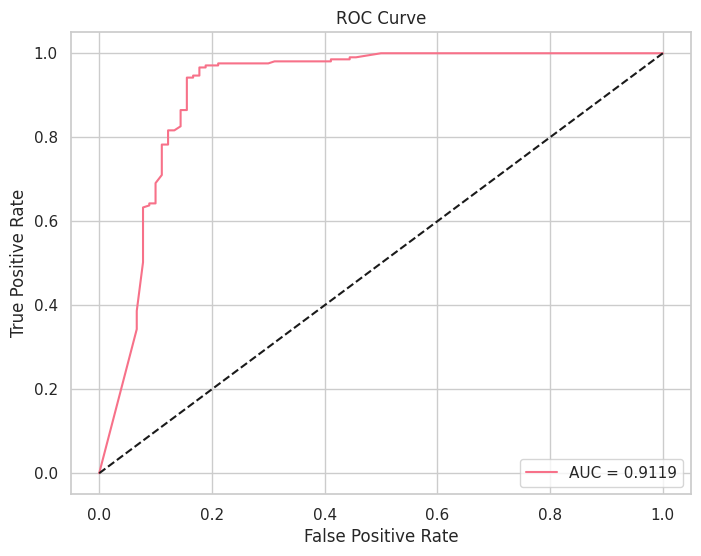

In [ ]:
# Prediksi
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Import necessary scoring functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f'Akurasi: {accuracy:.4f}')
print(f'Presisi: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'AUC: {auc:.4f}')

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 6.1. Akurasi (Accuracy)
Akurasi dihitung dengan rumus:
\[ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} \]
dimana:
- TP = True Positive
- TN = True Negative
- FP = False Positive
- FN = False Negative

### 6.2. Presisi (Precision)
Presisi dihitung dengan rumus:
\[ Precision = \frac{TP}{TP + FP} \]

### 6.3. Recall (Sensitivity)
Recall dihitung dengan rumus:
\[ Recall = \frac{TP}{TP + FN} \]

### 6.4. F1-Score
F1-Score adalah harmonic mean dari precision dan recall:
\[ F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall} \]

### 6.5. AUC-ROC
AUC (Area Under Curve) ROC (Receiver Operating Characteristic) adalah area di bawah kurva yang menggambarkan hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR):
\[ TPR = \frac{TP}{TP + FN} \]
\[ FPR = \frac{FP}{FP + TN} \]

## 7. Kesimpulan dan Rekomendasi

Berdasarkan analisis yang telah dilakukan:
1. Feature engineering telah dilakukan dengan menangani missing values dan encoding categorical variables
2. EDA menunjukkan distribusi data dan korelasi antar features
3. Model telah di-train dan dievaluasi menggunakan berbagai metrik klasifikasi